In [1]:
import pickle 

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from collections import defaultdict

In [8]:
import os
import sys
sys.path.insert(0, "..")

from methods.kt import CoinBettingCI, HorseRaceCI
from methods.lbup import LowerBoundStockInvestmentCI
from methods.up import StockInvestmentCI
from methods.hybrid import HybridCI
from methods.precise import PRECiSE

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
def generate_bernoulli(t, p, seed=0):
    np.random.seed(seed)
    return (np.random.uniform(size=t) <= p).astype(int)

In [11]:
def generate_beta(t, betas, seed=0):
    np.random.seed(seed)
    return np.random.beta(*betas, size=t)

# Experiments

In [22]:
wor = False

t = 5 * 10 ** 3
ts = np.arange(1, t + 1)

delta = 0.05
seeds = range(5)

tcut = 10 ** 4
tup = 50

In [26]:
# kwd = 'bern0.25'
# kwd = 'beta1,3'
# kwd = 'beta10,30'
# kwd = 'bern0.5'
# kwd = 'beta1,1'
# kwd = 'beta10,10'
kwd = 'bern0.01'

# import _pickle as cPickle
# with open(r'exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor)), "rb") as f:
#     lower_ci = cPickle.load(f)
# with open(r'exp-results/{}_wor{}_upper_ci.pkl'.format(kwd, int(wor)), "rb") as f:
#     upper_ci = cPickle.load(f)
# with open(r'exp-results/{}_wor{}_telapsed.pkl'.format(kwd, int(wor)), "rb") as f:
#     telapsed = cPickle.load(f)


In [27]:
lower_ci = defaultdict(lambda: np.zeros((len(seeds), t)))
upper_ci = defaultdict(lambda: np.zeros((len(seeds), t)))
telapsed = defaultdict(lambda: np.zeros((len(seeds), t // 100)))

for j, seed in enumerate(seeds):
    if kwd == 'bern0.01':
        xs = generate_bernoulli(t, p=0.01, seed=seed); mu = 0.01; title = 'Bern(0.01)'
    if kwd == 'bern0.25':
        xs = generate_bernoulli(t, p=0.25, seed=seed); mu = 0.25; title = 'Bern(0.25)'
    if kwd == 'beta1,3':
        xs = generate_beta(t, betas=[1, 3], seed=seed); mu = 0.25; title = 'Beta(1,3)'
    if kwd == 'beta10,30':
        xs = generate_beta(t, betas=[10, 30], seed=seed); mu = 0.25; title = 'Beta(10,30)'    
        
    if kwd == 'bern0.5':
        xs = generate_bernoulli(t, p=0.5, seed=seed); mu = 0.5; title = 'Bern(0.5)'
    if kwd == 'beta1,1':
        xs = generate_beta(t, betas=[1, 1], seed=seed); mu = 0.5; title = 'Beta(1,1)'
    if kwd == 'beta10,10':
        xs = generate_beta(t, betas=[10, 10], seed=seed); mu = 0.5; title = 'Beta(10,10)'        
    
    print("Seed {}: Naive coin betting...".format(seed))
#     lower_ci['CB'][j], upper_ci['CB'][j] = CoinBettingCI().construct(delta, xs[:tcut], wor=wor)
    
    print("Seed {}: Horse race...".format(seed))
    lower_ci['HR'][j], upper_ci['HR'][j], telapsed['HR'][j] = HorseRaceCI().construct(delta, xs[:tcut], wor=wor)
        
#     print("Seed {}: PRECiSE...".format(seed))
#     lower_ci['PRECiSE'][j], upper_ci['PRECiSE'][j], telapsed['PRECiSE'][j] = PRECiSE().construct(delta, xs[:tcut], wor=wor)

#     if 'bern' not in kwd:
#         print("Seed {}: UP...".format(seed))
#         lower_ci['UP'][j], upper_ci['UP'][j], telapsed['UP'][j], *_ = StockInvestmentCI().construct(delta, xs[:tcut], wor=wor)

#         print("Seed {}: LBUP...".format(seed))
#         lower_ci['LBUP1'][j], upper_ci['LBUP1'][j], telapsed['LBUP1'][j] = LowerBoundStockInvestmentCI(n=1).construct(delta, xs[:tcut], wor=wor, eps=1e-3)
#         lower_ci['LBUP2'][j], upper_ci['LBUP2'][j], telapsed['LBUP2'][j] = LowerBoundStockInvestmentCI(n=2).construct(delta, xs[:tcut], wor=wor, eps=1e-3)
#         lower_ci['LBUP3'][j], upper_ci['LBUP3'][j], telapsed['LBUP3'][j] = LowerBoundStockInvestmentCI(n=3).construct(delta, xs[:tcut], wor=wor, eps=1e-3)

#         print("Seed {}: HybridUP...".format(seed))
#         lower_ci['HybridUP1,{}'.format(tup)][j], upper_ci['HybridUP1,{}'.format(tup)][j], telapsed['HybridUP1,{}'.format(tup)][j] = HybridCI(n=1, tup=tup).construct(delta, xs[:tcut], wor=wor)
#         lower_ci['HybridUP2,{}'.format(tup)][j], upper_ci['HybridUP2,{}'.format(tup)][j], telapsed['HybridUP2,{}'.format(tup)][j] = HybridCI(n=2, tup=tup).construct(delta, xs[:tcut], wor=wor)
#         lower_ci['HybridUP3,{}'.format(tup)][j], upper_ci['HybridUP3,{}'.format(tup)][j], telapsed['HybridUP3,{}'.format(tup)][j] = HybridCI(n=3, tup=tup).construct(delta, xs[:tcut], wor=wor)
    

Seed 0: Naive coin betting...
Seed 0: Horse race...
100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 Seed 1: Naive coin betting...
Seed 1: Horse race...
100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 Seed 2: Naive coin betting...
Seed 2: Horse race...
100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 Seed 3: Naive coin betting...
Seed 3: Horse race...
100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 160

In [25]:
if not os.path.exists('exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor))):
    with open('exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor)), 'wb') as f:
        pickle.dump(dict(lower_ci), f)
    with open('exp-results/{}_wor{}_upper_ci.pkl'.format(kwd, int(wor)), 'wb') as f:
        pickle.dump(dict(upper_ci), f)
    with open('exp-results/{}_wor{}_telapsed.pkl'.format(kwd, int(wor)), 'wb') as f:
        pickle.dump(dict(telapsed), f)
else:
    print("Warning: {} already exists!".format('exp-results/{}_wor{}_lower_ci.pkl'.format(kwd, int(wor))))

# Plot!

In [28]:
line_configs = dict()
line_configs['CB'] = dict(c='brown', ls='solid', marker='x')
line_configs['HR'] = dict(c='m', ls='solid', marker='o')

line_configs['PRECiSE'] = dict(c='tab:pink', ls=(0, (3, 1, 1, 1)), marker='^')
line_configs['UP'] = dict(c='black', ls='-.', marker='D')

line_configs['LBUP1'] = dict(c='orange', ls='dotted', marker='+')
line_configs['LBUP2'] = dict(c='purple', ls='dotted', marker='+')
line_configs['LBUP3'] = dict(c='red', ls='dotted', marker='+')

line_configs['HybridUP1,50'] = dict(c='green', ls='--', marker='s', markersize=5)
line_configs['HybridUP2,50'] = dict(c='orange', ls='--', marker='s', markersize=5)
line_configs['HybridUP3,50'] = dict(c='blue', ls='--', marker='s', markersize=5)

for key in line_configs:
    line_configs[key]['markevery'] = 0.1

In [29]:
labels = dict()
labels['CB'] = 'CB'
labels['HR'] = 'HR'

labels['PRECiSE'] = 'PRECiSE'
labels['UP'] = 'UP'

labels['LBUP1'] = r'LBUP ($n$=1)'
labels['LBUP2'] = r'LBUP ($n$=2)'
labels['LBUP3'] = r'LBUP ($n$=3)'

labels['HybridUP1,50'] = r'HybridUP ($n$=1)' #',$t_{\mathsf{UP}}=50$)'
labels['HybridUP2,50'] = r'HybridUP ($n$=2)'
labels['HybridUP3,50'] = r'HybridUP ($n$=3)'


In [30]:
sizes = dict()
for key in upper_ci:
    sizes[key] = (upper_ci[key][:tcut] - lower_ci[key][:tcut]).mean(axis=0)

up_key = 'UP' if 'bern' not in kwd else 'HR'
for key in upper_ci:
    if key != up_key:
        sizes[key] = np.maximum(1e-7, sizes[key] - sizes[up_key])

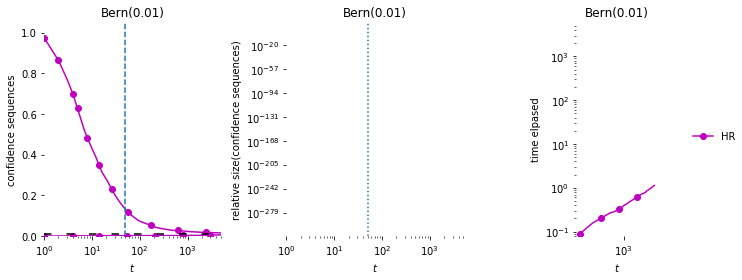

In [31]:
# plot
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10, 4))

# 1) plot confidence sequences
ax = axes[0]
for key in upper_ci:
    ax.plot(ts, lower_ci[key].mean(axis=0), **line_configs[key], label=labels[key])
    ax.plot(ts, upper_ci[key].mean(axis=0), **line_configs[key])
    
# etc
ax.axhline(y=mu, c='k', linestyle=(0, (5, 10)))
ax.axvline(x=tup, linestyle='dashed')
ax.set_xscale('log')
# ax.set_ylim([0.24, 0.26])
# ax.set_ylim([0.2, 0.3])
ax.set_ylim([0, 1.05])
ax.set_xlim([1, t])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel(r'$t$')
ax.set_ylabel('confidence sequences')
ax.set_title(title)

# 2) plot relative confidence sequence sizes compared to UP
ax = axes[1]
for key in upper_ci:
    if key != up_key:
        ax.plot(ts[:tcut], sizes[key], **line_configs[key], label=labels[key])

ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(x=50, linestyle='dotted')
# ax.set_ylim([-0.005, 1.01])
ax.set_xlim([1, t])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel(r'$t$')
ax.set_ylabel('relative size(confidence sequences)')
ax.set_title(title)

# 3) plot time elapsed
ax = axes[2]

every = 100
tlogs = np.arange(every, t + every, every)

for key in telapsed:
    ax.plot(tlogs, telapsed[key].mean(axis=0).cumsum(), **line_configs[key], label=labels[key])

ax.set_xlim([every, t])
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis('square')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel(r'$t$')
ax.set_ylabel('time elpased')
ax.set_title(title)

# show legends
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='center left', 
           bbox_to_anchor=(0.95, .5),
           ncol=1,
#            borderpad=2.5,
           frameon=False)
fig.tight_layout()
# fig.subplots_adjust(left=0, wspace=0.3) 
fig.savefig('figs/ex_{}.pdf'.format(kwd), bbox_inches='tight')

plt.show()

In [30]:
for key in telapsed:
    cumt = telapsed[key].mean(axis=0).cumsum()
    print(key, end=': ')
    coeffs = []
    for j in range(1, 11):
        coeffs.append((np.log(cumt[-j] - cumt[0]) - np.log(cumt[-j-1] - cumt[0])) / (np.log(tlogs[-j] - tlogs[0]) - np.log(tlogs[-j-1] - tlogs[0])))
    print(np.mean(coeffs))

HR: 0.7085883967262843
PRECiSE: 1.0668649062267266
UP: 1.4521251341047887
LBUP1: 0.7026519795875907
LBUP2: 0.907306985496153
LBUP3: 0.8531633330275475
HybridUP1,50: 0.7087215013125314
HybridUP2,50: 0.8434696963985487
HybridUP3,50: 0.8446358524533928


0


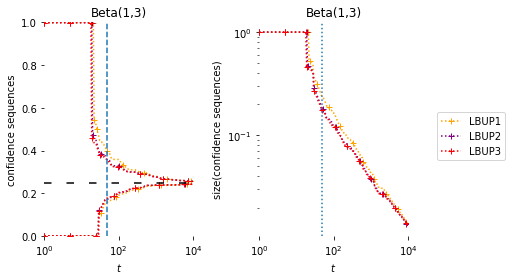

1


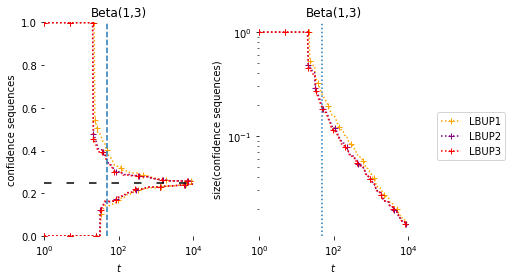

2


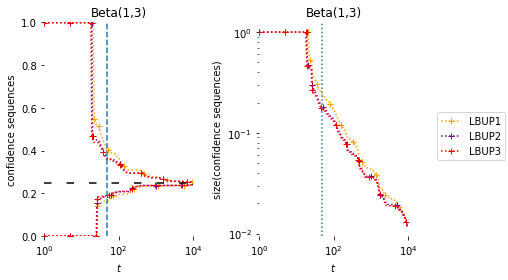

3


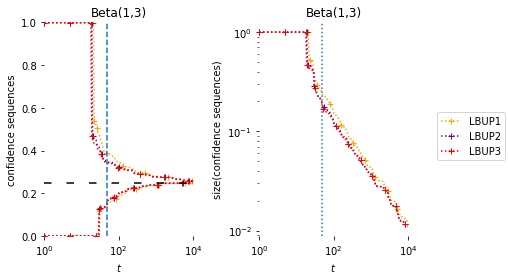

4


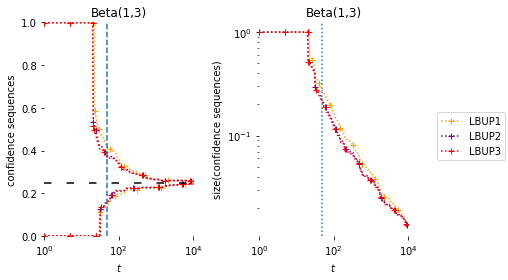

In [64]:
for j in range(5):
    print(j)
    
    # plot
    fig, axes = plt.subplots(ncols=2, nrows=1)
    
    ax = axes[0]
    for key in lower_ci:
        if 'LBUP' in key:
            ax.plot(ts[:tcut], lower_ci[key][j][:t], **line_configs[key], label=key)
            ax.plot(ts[:tcut], upper_ci[key][j][:t], **line_configs[key])

    ax.axhline(y=mu, c='k', linestyle=(0, (5, 10)))
    ax.axvline(x=tup, linestyle='dashed')
    ax.set_xscale('log')
    # ax.set_ylim([0.24, 0.26])
    # ax.set_ylim([0.2, 0.3])
    ax.set_ylim([0, 1])
    ax.set_xlim([1, t])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlabel(r'$t$')
    ax.set_ylabel('confidence sequences')
    ax.set_title(title)

    ax = axes[1]
    for key in lower_ci:
        if 'LBUP' in key:
            ax.plot(ts[:tcut], (upper_ci[key] - lower_ci[key])[j][:t], **line_configs[key], label=key)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axvline(x=50, linestyle='dotted')
    # ax.set_ylim([-0.005, 1.01])
    ax.set_xlim([1, t])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlabel(r'$t$')
    ax.set_ylabel('size(confidence sequences)')
    ax.set_title(title)

    handles, labels = ax.get_legend_handles_labels()
    fig.tight_layout()
    fig.legend(handles, labels, 
               loc='center left', 
               bbox_to_anchor=(1, .5),
               ncol=1)

    plt.show()